In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import các thư viện cần thiết

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import backend as K
import sklearn
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
# train_data_dir = '/content/drive/MyDrive/NCKH/data/train'
train_data_dir='/content/drive/MyDrive/NCKH/data 2/test'
test_data_dir = '/content/drive/MyDrive/NCKH/data/test'
valid_data_dir = '/content/drive/MyDrive/NCKH/data/validation'

#Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# network parameters
sample      = 6000
image_size  = 128
input_shape = (image_size, image_size, 3)
batch_size  = 32
epochs      = 50
num_classes    = 530
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='input'
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='input'
)
# train_generator_inf = test_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(image_size, image_size),
#     batch_size=32,
#     class_mode='input'
# )
validation_generator_inf = validation_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='input'
)

Found 547 images belonging to 530 classes.
Found 1060 images belonging to 530 classes.
Found 1060 images belonging to 530 classes.


# Test data

In [ ]:
input_shape = (128, 128, 3)
num_classes = 530
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 200
image_size = 128
patch_size = 16
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 8
mlp_head_units = [2048, 1024]


#processing data

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Đường dẫn tới thư mục chứa dữ liệu train
train_folder = "/content/drive/MyDrive/Colab Notebooks/data/train"
test_folder = "/content/drive/MyDrive/Colab Notebooks/data/test"
val_folder = "/content/drive/MyDrive/Colab Notebooks/data/validation"
# Hàm để load và chuyển đổi ảnh thành mảng numpy
def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(128, 128))  # Kích thước có thể điều chỉnh theo ý muốn
    img_array = img_to_array(img)
    img_array /= 255.0  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    return img_array

# Hàm để tạo danh sách ảnh và nhãn từ một thư mục
def load_images_from_folder(folder):
    image_files = []
    labels = []
    for person_folder in os.listdir(folder):
        person_path = os.path.join(folder, person_folder)
        if os.path.isdir(person_path):
            person_images = [os.path.join(person_path, f) for f in os.listdir(person_path) if f.endswith(".jpeg") or f.endswith(".png")]
            image_files.extend(person_images)
            labels.extend([person_folder] * len(person_images))
    return image_files, labels

# Load ảnh và nhãn cho tập huấn luyện
train_files, y_train = load_images_from_folder(train_folder)

# Load và chuyển đổi ảnh cho tập huấn luyện
x_train = np.array([load_and_preprocess_image(file) for file in train_files])

y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)


np.save('/content/drive/MyDrive/Colab Notebooks/data/x_train.npy', x_train)
np.save('/content/drive/MyDrive/Colab Notebooks/data/y_train.npy', y_train)


# loaded_x_train = np.load('/content/drive/MyDrive/Colab Notebooks/data/x_train.npy')
# loaded_y_train = np.load('/content/drive/MyDrive/Colab Notebooks/data/y_train.npy')






In [ ]:
import numpy as np

In [ ]:
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/data/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/data/y_train.npy')

In [ ]:
# Load ảnh và nhãn cho tập huấn luyện
test_files, y_test = load_images_from_folder(test_folder)

# Load và chuyển đổi ảnh cho tập huấn luyện
x_test = np.array([load_and_preprocess_image(file) for file in test_files])

y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)


np.save('/content/drive/MyDrive/Colab Notebooks/data/x_test.npy', x_test)
np.save('/content/drive/MyDrive/Colab Notebooks/data/y_test.npy', y_test)


In [ ]:
x_test = np.load('/content/drive/MyDrive/Colab Notebooks/data/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/data/y_test.npy')

In [ ]:
# Load ảnh và nhãn cho tập huấn luyện
val_files, y_val = load_images_from_folder(val_folder)

# Load và chuyển đổi ảnh cho tập huấn luyện
x_val = np.array([load_and_preprocess_image(file) for file in val_files])

y_val = np.array(y_val)
y_val = y_val.reshape(-1, 1)



np.save('/content/drive/MyDrive/Colab Notebooks/data/x_val.npy', x_val)
np.save('/content/drive/MyDrive/Colab Notebooks/data/y_val.npy', y_val)




In [ ]:
x_val = np.load('/content/drive/MyDrive/Colab Notebooks/data/x_val.npy')
y_val = np.load('/content/drive/MyDrive/Colab Notebooks/data/y_val.npy')

In [ ]:
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_train shape: {x_test.shape} - y_train shape: {y_test.shape}")
print(f"x_train shape: {x_val.shape} - y_train shape: {y_val.shape}")

x_train shape: (3179, 128, 128, 3) - y_train shape: (3179, 1)
x_train shape: (1060, 128, 128, 3) - y_train shape: (1060, 1)
x_train shape: (1060, 128, 128, 3) - y_train shape: (1060, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Fit và chuyển đổi tên thành các số nguyên
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
y_val = label_encoder.fit_transform(y_val)

# Kiểm tra độ đa dạng của nhãn
unique_labels = np.unique(y_test)
print(f"Encoded Labels: {y_test}")
print(f"Unique Labels: {unique_labels}")




#data augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(128, 128),
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
data_augmentation.layers[0].adapt(x_train)


# ViT

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.sigmoid)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [ ]:
from tensorflow.keras import layers
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


Image size: 128 X 128
Patch size: 16 X 16
Patches per image: 64
Elements per patch: 768


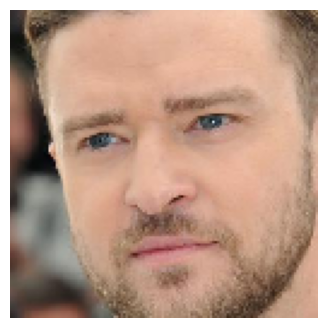

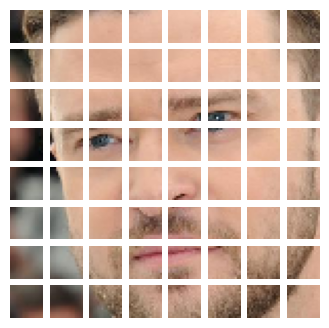

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim,activation='sigmoid')
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [ ]:
!pip install -U tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)

    augmented = data_augmentation(inputs)

    patches = Patches(patch_size)(augmented)

    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):

        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        encoded_patches = layers.Add()([x3, x2])


    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    logits = layers.Dense(num_classes,activation='sigmoid')(features)
    softmax = layers.Softmax()(logits)
    model = keras.Model(inputs=inputs, outputs=softmax)
    return model
# classification dùng softmax, dense phải chung với sigmoid,conv phải chung với relu

In [ ]:
vit_classifier = create_vit_classifier()
vit_classifier.summary()

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(1, name="top-1-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    early_stopping_callback = keras.callbacks.EarlyStopping(
      monitor="val_accuracy",
      patience=10,
      restore_best_weights=True
    )

    history = model.fit(
      x=x_train,
      y=y_train,
      batch_size=batch_size,
      epochs=100,
      validation_data=(x_val, y_val),
      callbacks=[checkpoint_callback],
    )


    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 1 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
# vit_classifier.summary()
history = run_experiment(vit_classifier)


Epoch 1/100
100/100 [==============================] - 17s 81ms/step - loss: 6.2814 - accuracy: 6.2913e-04 - top-1-accuracy: 6.2913e-04 - val_loss: 6.2729 - val_accuracy: 0.0019 - val_top-1-accuracy: 0.0019
Epoch 2/100
100/100 [==============================] - 4s 44ms/step - loss: 6.2731 - accuracy: 6.2913e-04 - top-1-accuracy: 6.2913e-04 - val_loss: 6.2729 - val_accuracy: 0.0019 - val_top-1-accuracy: 0.0019
Epoch 3/100
100/100 [==============================] - 6s 61ms/step - loss: 6.2730 - accuracy: 0.0016 - top-1-accuracy: 0.0016 - val_loss: 6.2729 - val_accuracy: 0.0028 - val_top-1-accuracy: 0.0028
Epoch 4/100
100/100 [==============================] - 5s 49ms/step - loss: 6.2730 - accuracy: 0.0025 - top-1-accuracy: 0.0025 - val_loss: 6.2729 - val_accuracy: 0.0019 - val_top-1-accuracy: 0.0019
Epoch 5/100
100/100 [==============================] - 4s 42ms/step - loss: 6.2729 - accuracy: 0.0013 - top-1-accuracy: 0.0013 - val_loss: 6.2728 - val_accuracy: 0.0019 - val_top-1-accuracy: 

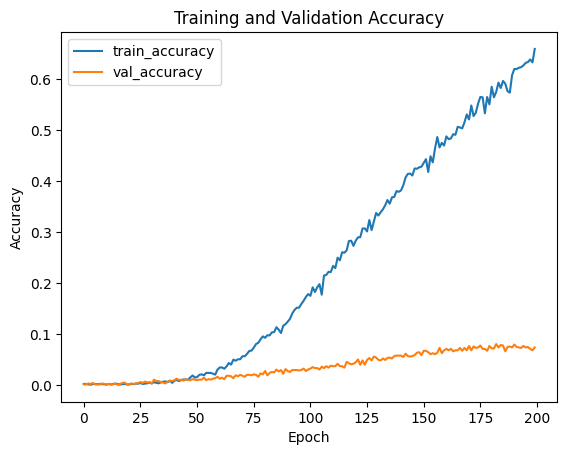

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)


#Vision Transformer